# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [2]:
#Goal: predict if a company goes bankrupt or not
#Since 96 features, use dimensionality reduction techniques (eg. PCA) or feature selection to improve performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import tree

In [3]:
df = pd.read_csv('datasets/data.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [7]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

DecisionTreeClassifier: accuracy = 0.964


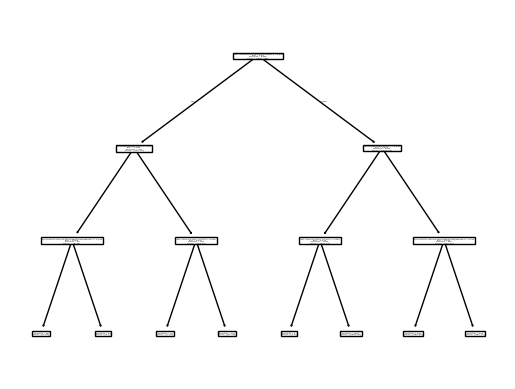

In [7]:
#First, we split the data
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)
depth = 3

#dividing data into 80% for training model and 20% for evaluating model performance
#random_state parameter is a way to control randomness in certain ml processes so that results can be produced consistently; here, since the train_test_split() function randomly divides data into testing and training, the random_state parameter fixes randomness so that the split is always the same even when code is run multiple times. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#initialise the decision tree classifier
#max_depth of tree is not too big to prevent overfitting
#random_state parameter here, ensures decision tree makes the same splits in same order every time u train it given the same data. 
sk_model = DecisionTreeClassifier(max_depth=depth, random_state=1)
sk_model.fit(x_train, y_train) #train the model

sk_pred = sk_model.predict(x_test) #predicts target variable for test dataset

acc = (y_test == sk_pred).mean() #now we find accuracy by comparing the predicted label and actual label -- so result will be the proportion of correctly predicted samples out of total test samples.
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))


#visualising decision tree
feature_names = x.columns.tolist()
tree.plot_tree(sk_model, feature_names=feature_names) #draws out decision tree structure with splitting criteria(how model splits data at each node), leaf nodes(fiinal predictions), feature importance (features used in decision-making)
plt.show()


#without random_state in both instances, 1) the train-test splits will change making model evaluations inconsistent and 2) decision tree splits will change altering the tree structure and potentially accuracy.


Depth = 1, train_acc = 0.9702, eval_acc = 0.9619
Depth = 2, train_acc = 0.9702, eval_acc = 0.9619
Depth = 3, train_acc = 0.9742, eval_acc = 0.9619
Depth = 4, train_acc = 0.9786, eval_acc = 0.9609
Depth = 5, train_acc = 0.9826, eval_acc = 0.9638
Depth = 6, train_acc = 0.9872, eval_acc = 0.9619
Depth = 7, train_acc = 0.9914, eval_acc = 0.9619
Depth = 8, train_acc = 0.9937, eval_acc = 0.9580


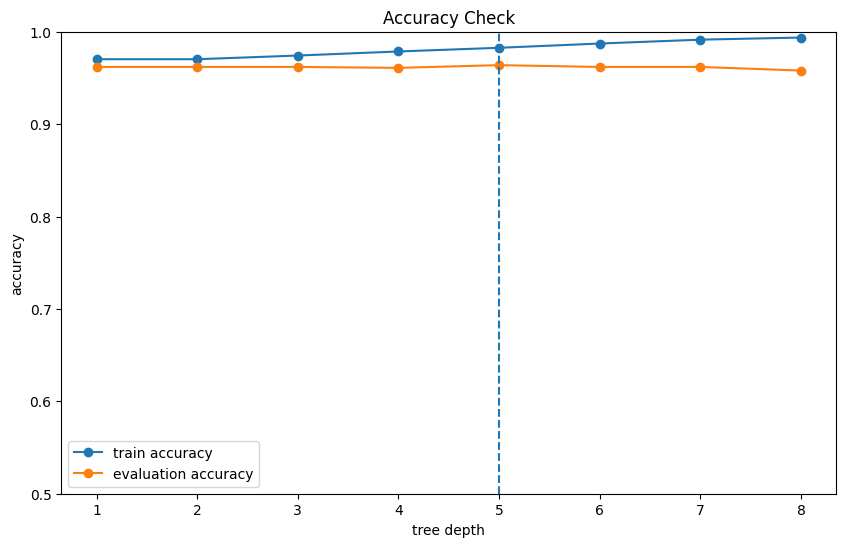

In [8]:
#ridiculously complex decision tree so we do feature selection
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

#we know that training is 70%, validation set is 15%, and test set is also 15%
#don't understand the specific for this
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

#training decision trees of various diff depths
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
        model = DecisionTreeClassifier(max_depth=d)
        model.fit(x_train, y_train)

        y_pred = model.predict(x_train)
        train_acc.append((y_pred == y_train).mean()) #model's performance on training date

        y_pred = model.predict(x_eval)
        eval_acc.append((y_pred == y_eval).mean()) #model's performance on unseen evaluation data; Note if validation accuracy drops as depth increases, model is overfitting

        print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))


#now we find the optimal depth with highest accuracy of validation data. 
opt_depth = np.argmax(eval_acc) + 1

#visualising accuracy changes when we change depth --> checking for overfitting
plt.figure(figsize=(10, 6))
plt.plot(train_acc, marker='o', label='train accuracy')
plt.plot(eval_acc, marker='o', label='evaluation accuracy')
plt.legend()
plt.title('Accuracy Check')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 5, test_acc = 0.9541


<Figure size 2000x1000 with 0 Axes>

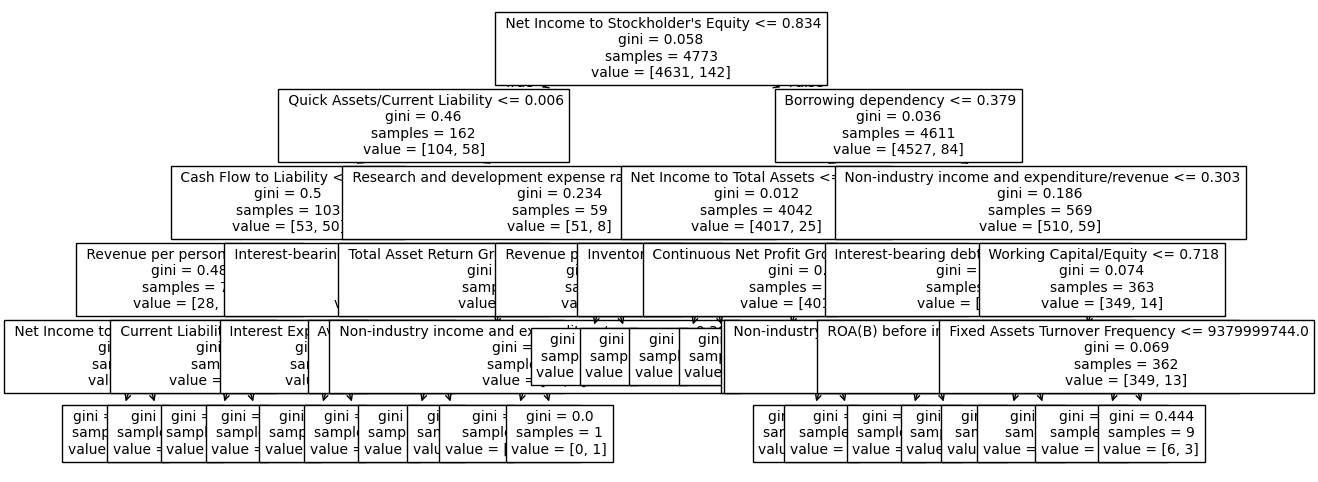

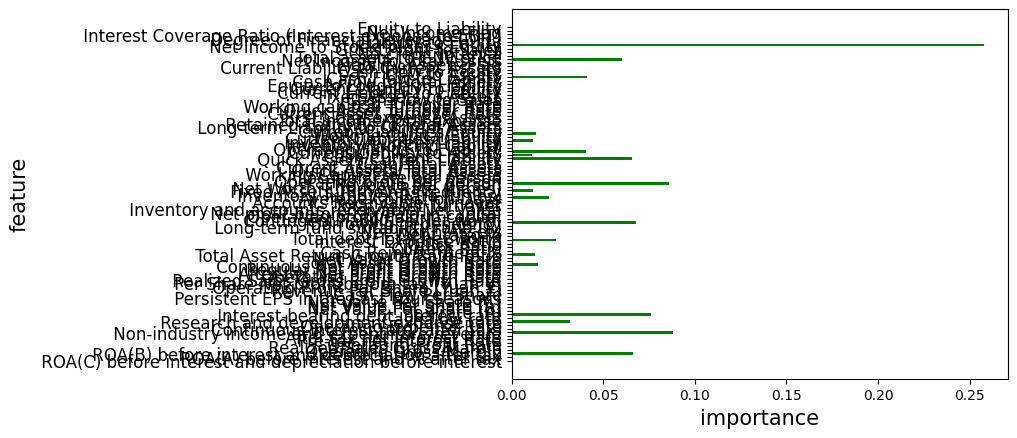

feature importance = [0.    0.    0.066 0.    0.    0.    0.    0.    0.088 0.    0.    0.032
 0.    0.076 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.014 0.    0.    0.013 0.    0.    0.    0.024 0.
 0.    0.    0.    0.068 0.    0.    0.    0.    0.    0.    0.02  0.
 0.012 0.    0.086 0.    0.    0.    0.    0.    0.    0.066 0.011 0.041
 0.    0.    0.011 0.    0.013 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.041 0.    0.    0.
 0.    0.06  0.    0.    0.    0.258 0.    0.    0.    0.    0.   ]


In [9]:
#i set max_step=5 as a constant value for tree visualisation
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)

#evaluating final performance w test data
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))

# Visualize the tree
plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.higher score means more impt features
feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

#bar chart for feature importance
plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=12)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))

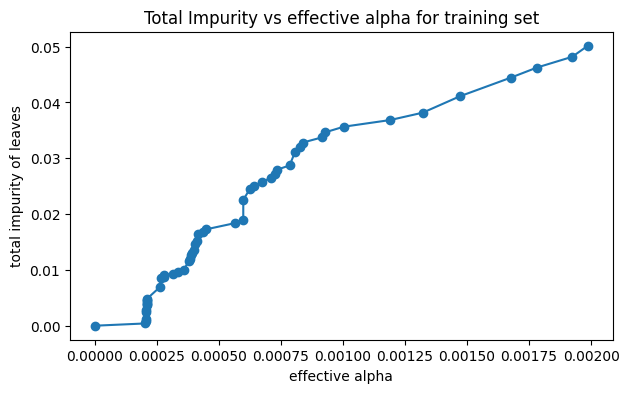

0) alpha = 0.0000 done.
1) alpha = 0.0002 done.
2) alpha = 0.0002 done.
3) alpha = 0.0002 done.
4) alpha = 0.0002 done.
5) alpha = 0.0002 done.
6) alpha = 0.0002 done.
7) alpha = 0.0002 done.
8) alpha = 0.0002 done.
9) alpha = 0.0002 done.
10) alpha = 0.0002 done.
11) alpha = 0.0002 done.
12) alpha = 0.0003 done.
13) alpha = 0.0003 done.
14) alpha = 0.0003 done.
15) alpha = 0.0003 done.
16) alpha = 0.0003 done.
17) alpha = 0.0003 done.
18) alpha = 0.0004 done.
19) alpha = 0.0004 done.
20) alpha = 0.0004 done.
21) alpha = 0.0004 done.
22) alpha = 0.0004 done.
23) alpha = 0.0004 done.
24) alpha = 0.0004 done.
25) alpha = 0.0004 done.
26) alpha = 0.0004 done.
27) alpha = 0.0004 done.
28) alpha = 0.0004 done.
29) alpha = 0.0006 done.
30) alpha = 0.0006 done.
31) alpha = 0.0006 done.
32) alpha = 0.0006 done.
33) alpha = 0.0006 done.
34) alpha = 0.0007 done.
35) alpha = 0.0007 done.
36) alpha = 0.0007 done.
37) alpha = 0.0007 done.
38) alpha = 0.0008 done.
39) alpha = 0.0008 done.
40) alpha 

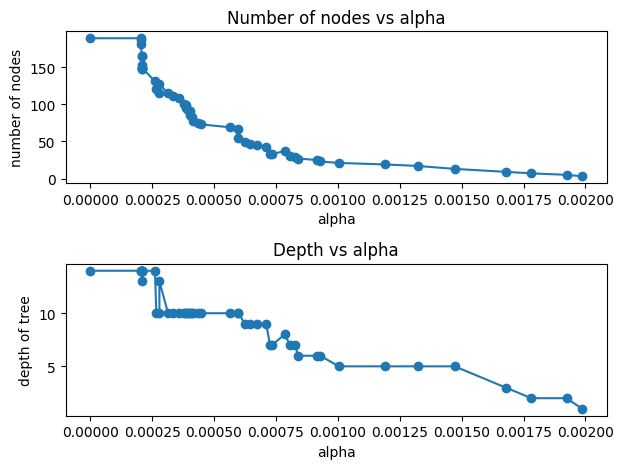

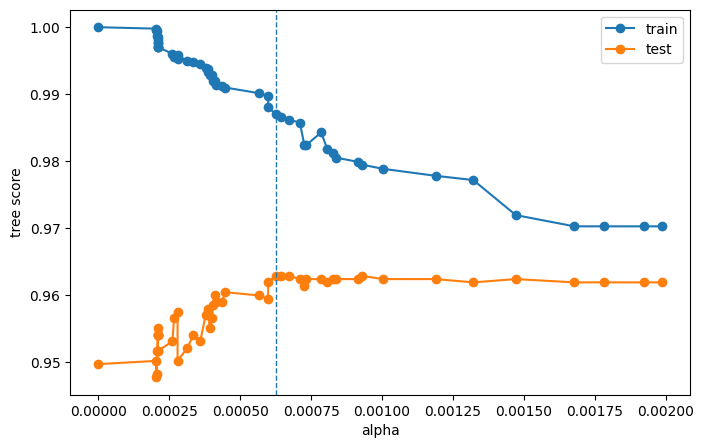

Accuracy of test data = 0.9629
Optimal alpha = 0.00062487


In [10]:
#we do cost complexity pruning to balance the trade off bw tree size and proper fit of training data

y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

#compute cost complexity pruning path
model = DecisionTreeClassifier()
path =  model.cost_complexity_pruning_path(x_train, y_train) #creates a seq of effective alpha (ccp_alpha) values, where each corresponds to a simpler pruned tree
ccp_alpha = path.ccp_alphas[:-1] #we exclude last alpha cos its basically a fully pruned tree no one wants that
impurity = path.impurities[:-1] #measures total impurity of tree's leaves for each alpha. impurity increases as tree is pruned.

#as alpha increases, we get simpler trees and increased impurity (misclassification error)
plt.figure(figsize=(7,4))
plt.plot(ccp_alpha, impurity, marker='o')
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

#now for each alpha in the alpha-list, we create a tree
models = []
for i, alpha in enumerate(ccp_alpha):
    model = DecisionTreeClassifier(ccp_alpha=alpha)
    model.fit(x_train, y_train)
    models.append(model)
    print('%d) alpha = %.4f done.' % (i, alpha))

#as alpha incr, number and depth of nodes decrease
node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alpha, node_counts, marker="o")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alpha, depth, marker="o")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# #Don't understand from here down
# Among the candidate trees, find the one with the lowest 
# misclassification rate on the test data. It's the same to find 
# the tree with the highest score.
# Calculate the score of the tree (model) with alpha applied.
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Find the alpha that creates the tree with the highest score on the test data. This is the optimal alpha, and the tree is optimal.
i_max = np.argmax(test_score)
opt_alpha = ccp_alpha[i_max]
opt_model = models[i_max]

# Observe the change in score for the change in alpha.
plt.figure(figsize=(8,5))
plt.plot(ccp_alpha, train_score, marker='o', label='train')
plt.plot(ccp_alpha, test_score, marker='o', label='test')
plt.axvline(x=opt_alpha, ls='--', lw=1.0)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('tree score')
plt.show()

# Evaluate the performance of the final tree.
print('Accuracy of test data = %.4f' % opt_model.score(x_test, y_test))
print('Optimal alpha = %.8f' % opt_alpha)